In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [31]:

def process_files(currency):
    if (currency == 'USD'):
        all_files = ['data/raw/trades/USD/USD_20130128-20130208.xlsx',
                     'data/raw/trades/USD/USD_20130211-20130222.xlsx']
    elif (currency == 'CAD'):
        all_files = ['data/raw/trades/CAD/CAD_20130128-20130208.xlsx',
                     'data/raw/trades/CAD/CAD_20130211-20130222.xlsx']
    
    df_list = []
    for file in all_files:
        df = pd.read_excel(file)
        df_list.append(df)
    
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Filter conditions
    conditions = (
        (combined_df['Type'] == 'IRS Fix-Float') &
        (combined_df['Leg 2'].isin(['USD-LIBOR-BBA', 'CAD-BA-CDOR'])) &
        (combined_df['T'].isin(['1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y', '15Y', '30Y']))
    )
    
    filtered_df = combined_df[conditions]
    filtered_df['Trade Time'] = pd.to_datetime(filtered_df['Trade Time'])
    filtered_df['Rate 1'] = filtered_df['Rate 1'].astype(float)
    return filtered_df


In [32]:

def calculate_realized_volatility(df, window='1D'):
    df = df.set_index('Trade Time')
    df = df.sort_index()
    
    # Calculate log returns
    df['log_return'] = np.log(df['Rate 1'] / df['Rate 1'].shift(1))
    
    # Calculate realized volatility
    realized_vol = df['log_return'].rolling(window=window).std() * np.sqrt(252)
    
    return realized_vol


In [33]:

# Process USD and CAD data
usd_data = process_files('USD')
cad_data = process_files('CAD')


/var/folders/v2/2g59sj7s7qbcgl_0l5zkx1gm0000gn/T/ipykernel_92058/1386031642.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Trade Time'] = pd.to_datetime(filtered_df['Trade Time'])
/var/folders/v2/2g59sj7s7qbcgl_0l5zkx1gm0000gn/T/ipykernel_92058/1386031642.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Rate 1'] = filtered_df['Rate 1'].astype(float)
/var/folders/v2/2g59sj7s7qbcgl_0l5zkx1gm0000gn/T/ipykernel_92058/1386031642.py:24: SettingWithCopyWarning: 
A value is tryin

/Users/arnobalam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


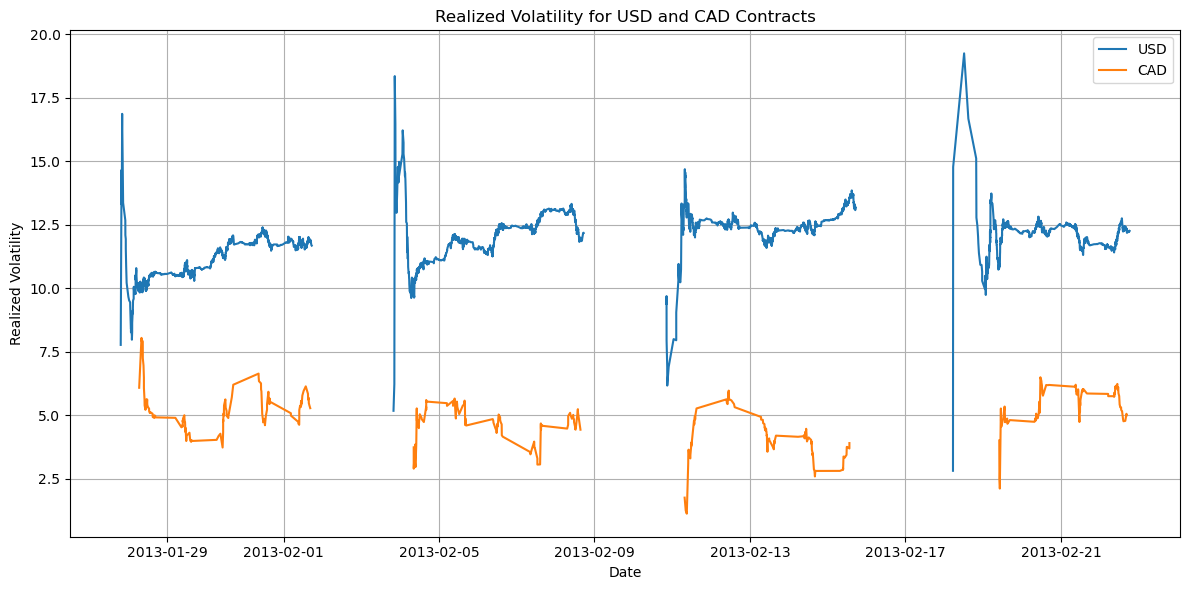

In [34]:

# Calculate realized volatility
usd_vol = calculate_realized_volatility(usd_data)
cad_vol = calculate_realized_volatility(cad_data)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(usd_vol.index, usd_vol.values, label='USD')
plt.plot(cad_vol.index, cad_vol.values, label='CAD')
plt.title('Realized Volatility for USD and CAD Contracts')
plt.xlabel('Date')
plt.ylabel('Realized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()